In [ ]:
import os
import io
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
os.environ['HF_HUB_TIMEOUT'] = '600'  # Timeout in seconds


In [ ]:
from transformers import AutoModel , AutoTokenizer, AutoModelForSequenceClassification , BertTokenizer, BertForSequenceClassification

import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('AhmedBou/TuniBert')

model = AutoModelForSequenceClassification.from_pretrained('AhmedBou/TuniBert')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Arabizi-Dailect-Train.csv to Arabizi-Dailect-Train.csv


In [ ]:
df0 = pd.read_csv("Arabizi-Dailect-Train.csv")


In [ ]:
df0

,text,label
0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,ak slouma,1
4,entom titmanou lina a7na 3iid moubarik a7na ch...,-1
...,...,...
74928,anyone 3ndo mouse ma bta3mel sot abadan?,0
74929,please fill this survey la rfi2te 3m ta3mel th...,0
74930,@saragermanos rah eb3atlik ra2me dm yalla lahza,0
74931,hayda 4 goal la messi,0


In [ ]:
df0 = df0.drop(df0[df0['label'] == 0].index)


In [ ]:
df0['label'] = df0['label'].replace(-1, 0)


In [ ]:
df0

,text,label
0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,0
1,cha3eb fey9elkoum menghir ta7ayoul ou kressi,0
2,bereau degage nathef ya slim walahi ya7chiw fi...,0
3,ak slouma,1
4,entom titmanou lina a7na 3iid moubarik a7na ch...,0
...,...,...
74914,@ClementHakim helo el tafe2ol ;):p,1
74915,lah helo short hair,1
74916,ya allah enta w batnak hahahaha,1
74917,-malla a7lam ya zalame -eh man sa2ile ktir - l...,1


In [ ]:
uploaded = files.upload()

Saving tun.xlsx to tun.xlsx


In [ ]:
df1 = pd.read_excel("tun.xlsx")


In [ ]:
df1 = df1.rename(columns={'texts': 'text', 'data_labels': 'label'})


In [ ]:
df=pd.concat([df0,df1],axis=0)
df.shape

(104089, 2)

In [ ]:
df

,text,label
0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,0
1,cha3eb fey9elkoum menghir ta7ayoul ou kressi,0
2,bereau degage nathef ya slim walahi ya7chiw fi...,0
3,ak slouma,1
4,entom titmanou lina a7na 3iid moubarik a7na ch...,0
...,...,...
32813,[علم موقع نسمة، باخرة إيطالية، وصلت ساعة متأخر...,0
32814,[رجع الهم، زايد بلاد بلا راجل، موش سكرتو الحدو...,0
32815,[نداء الى رئيس الجمهورية],0
32816,[هبط الجيش واقفل الحدود وأعلن الحالة القصوى وك...,0


In [ ]:
import nltk
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()

    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


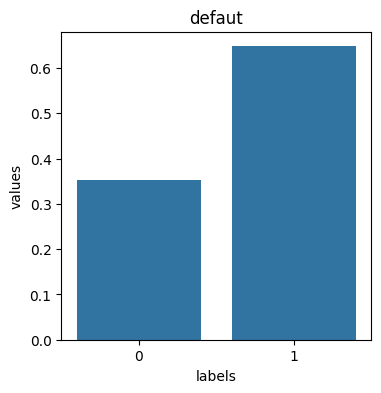

In [ ]:
temp = df.label.value_counts()
df_class = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(df)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()

Minimum Length: 2
Maximum Length: 9700


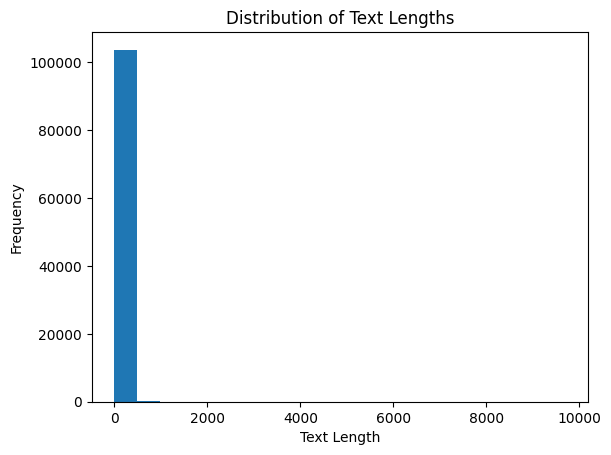

In [ ]:
text_lengths = [len(text) for text in df['text']]
# Calculate statistics
min_length = min(text_lengths)
max_length = max(text_lengths)


# Print statistics
print("Minimum Length:", min_length)
print("Maximum Length:", max_length)


# Create a histogram
plt.hist(text_lengths, bins=20)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
import pandas as pd


df_positive = df[df['label'] == 1].sample(n=20000, random_state=42)
df_negative = df[df['label'] == 0].sample(n=20000, random_state=42)

# Concatenate the sampled data
df_downsampled = pd.concat([df_positive, df_negative])

# Shuffle the data to mix the classes
df1 = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the distribution
print(df1['label'].value_counts(normalize=True))

label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,             # Max length to truncate/pad
            padding='max_length',           # Pad sentence to max length
            truncation=True,                # Truncate sentences longer than MAX_LEN
            return_attention_mask=True      # Return attention mask
        )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks


In [ ]:
# Check for non-string values in the dataset
non_string_count = df1['text'].apply(lambda x: not isinstance(x, str)).sum()
print(f"Number of non-string entries: {non_string_count}")

# Optional: Convert all non-string entries to empty strings or handle them as needed
df1['text'] = df1['text'].apply(lambda x: str(x) if not pd.isna(x) else "")


Number of non-string entries: 0


In [ ]:
from sklearn.model_selection import train_test_split

# Assume you have your data in X and y
X = df1.text.values
y = df1.label.values

# First, split the data into 80% train and 20% temporary set (which will later be split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now split the temporary set into 50% validation and 50% test (which gives 10% of the original data for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 32000
Validation set size: 4000
Test set size: 4000


In [ ]:
# Ensure all entries in df.text are strings
df1['text'] = df1['text'].astype(str)

# Encode the data without returning tensors
encoded_comments = [tokenizer.encode(T, add_special_tokens=True) for T in df1.text if isinstance(T, str)]

# Find the maximum length
max_len = max([len(sent) for sent in encoded_comments])
print('Max length: ', max_len)

Max length:  4965


In [ ]:
# Specify `MAX_LEN`
MAX_LEN = 128

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X_train[0]])[0].squeeze().numpy())
print('Original: ', X_train[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

Original:  ti brabi rou7 nayek
Token IDs:  [2, 12176, 28460, 25063, 60, 3262, 1067, 56, 4245, 1048, 1068, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    #bert_classifier = model(freeze_bert)
    bert_classifier=model
    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time
import torch
import torch.nn as nn
import numpy as np

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits.logits, b_labels) # Access the logits tensor within the SequenceClassifierOutput object
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")




def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        # Access logits from the returned object
        loss = loss_fn(logits.logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        # Access logits from the returned object
        preds = torch.argmax(logits.logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
# Example usage
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(bert_classifier, train_dataloader, val_dataloader, epochs=3, evaluation=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   1.725106   |     -      |     -     |   13.26  
   1    |   40    |   0.688213   |     -      |     -     |   11.67  
   1    |   60    |   0.603805   |     -      |     -     |   11.93  
   1    |   80    |   0.541170   |     -      |     -     |   12.22  
   1    |   100   |   0.559623   |     -      |     -     |   12.62  
   1    |   120   |   0.558766   |     -      |     -     |   13.10  
   1    |   140   |   0.557764   |     -      |     -     |   13.17  
   1    |   160   |   0.539937   |     -      |     -     |   12.82  
   1    |   180   |   0.523263   |     -      |     -     |   12.60  
   1    |   200   |   0.561556   |     -      |     -     |   12.48  
   1    |   220   |   0.572319   |     -      |     -     |   12.50  
   1    |   240   |   0.517284   |     -      |     -     |   12.62  


In [ ]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
train(bert_classifier, full_train_dataloader, epochs=3)

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.273545   |     -      |     -     |   13.38  
   1    |   40    |   0.271676   |     -      |     -     |   12.72  
   1    |   60    |   0.301716   |     -      |     -     |   12.66  
   1    |   80    |   0.280744   |     -      |     -     |   12.60  
   1    |   100   |   0.260665   |     -      |     -     |   12.64  
   1    |   120   |   0.344531   |     -      |     -     |   12.69  
   1    |   140   |   0.326464   |     -      |     -     |   12.75  
   1    |   160   |   0.306489   |     -      |     -     |   12.76  
   1    |   180   |   0.281571   |     -      |     -     |   12.70  
   1    |   200   |   0.332187   |     -      |     -     |   12.66  
   1    |   220   |   0.281100   |     -      |     -     |   12.64  
   1    |   240   |   0.291157   |     -      |     -     |   12.63  


In [ ]:
import torch

# Save the trained model
torch.save(bert_classifier.state_dict(), 'Tunibert.pth')

In [ ]:
import torch

def bert_predict(comment, model, tokenizer, max_len=MAX_LEN):
    """Preprocess the input comment and use the model to predict the label.

    Args:
    - comment (str): The input comment to classify.
    - model (torch.nn.Module): The trained BERT model.
    - tokenizer (transformers.PreTrainedTokenizer): The tokenizer associated with the BERT model.
    - max_len (int): Maximum length for padding/truncation.
    - device (str): Device to use ('cpu' or 'cuda').

    Returns:
    - label (int): Predicted label for the comment (0 for neutral, 1 for positive, 2 for negative).
    """
    # Preprocess the comment
    encoded_comment = tokenizer.encode_plus(
        text_preprocessing(comment),  # Preprocess the comment
        add_special_tokens=True,      # Add special tokens [CLS] and [SEP]
        max_length=max_len,           # Pad or truncate to max length
        padding='max_length',         # Pad to max length
        truncation=True,              # Truncate longer sentences
        return_attention_mask=True,   # Generate attention mask
        return_tensors='pt'           # Return PyTorch tensors
    )

    # Move tensors to the device (GPU/CPU)
    input_ids = encoded_comment['input_ids'].to(device)
    attention_mask = encoded_comment['attention_mask'].to(device)

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():
        # Perform forward pass
        outputs = model(input_ids, attention_mask=attention_mask)

        # Extract logits directly
        logits = outputs.logits

    # Convert logits to predicted label
    predicted_label = logits.argmax(dim=-1).item()

    return predicted_label


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

def roc_curve__confusion_matrix(model):
    # Prétraitement des données
    inp_tok_test = preprocessing_for_bert(X_test)
    inp_tok_train = preprocessing_for_bert(X_train)

    # Faire des prédictions
    with torch.no_grad():
        outputs_test = model(**inp_tok_test)
        outputs_train = model(**inp_tok_train)

    # Extraction des logits
    y_prob_test = outputs_test.logits[:, 1].detach().cpu().numpy()
    y_prob_train = outputs_train.logits[:, 1].detach().cpu().numpy()

    # Prédiction binaire
    prediction = np.where(y_prob_test < 0.5, 0, 1).reshape(len(X_test), 1)

    # Calcul des courbes ROC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)

    # Calcul de l'AUC
    roc_auc_test = auc(fpr_test, tpr_test)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Matrice de confusion pour le jeu de test
    confusion_matrix_test = confusion_matrix(y_test, prediction)

    # Création des sous-plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Tracer les courbes ROC
    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    # Affichage de la matrice de confusion
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')
    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)')

    plt.tight_layout()
    plt.show()

roc_curve__confusion_matrix(model)


TypeError: BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): BertIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): BertOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (pooler): BertPooler(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (activation): Tanh()
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=768, out_features=3, bias=True)
) argument after ** must be a mapping, not tuple

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_accuracy(predicted_labels, y_true):
    """
    Print accuracy, confusion matrix, and classification report based on predicted labels and true values.

    @params    predicted_labels (np.array): an array of predicted labels with shape (len(y_true),)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    accuracy = accuracy_score(y_true, predicted_labels)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print confusion matrix
    cm = confusion_matrix(y_true, predicted_labels)
    print('Confusion Matrix:')
    print(cm)

    # Print classification report
    report = classification_report(y_true, predicted_labels, target_names=['Negative', 'Positive'])
    print('Classification Report:')
    print(report)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def simulate_probs_and_evaluate_roc(predicted_labels, y_true):
    """
    Estimate the ROC curve and AUC from predicted labels by simulating probabilities.

    @params    predicted_labels (np.array): an array of predicted labels with shape (len(y_true),)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    # Simulate probabilities (0.5 for all predicted labels)
    simulated_probs = np.zeros((len(y_true), 2))
    simulated_probs[np.arange(len(y_true)), predicted_labels] = 1

    # Extract probabilities for the positive class (class 1)
    preds = simulated_probs[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC (approximate): {roc_auc:.4f}')

    # Plot ROC curve
    plt.figure()
    plt.title('Receiver Operating Characteristic (Approximate)')
    plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:
predicted_labels =
evaluate_accuracy(predicted_labels, y_val)


In [ ]:
# Load the saved model
model_path = '/content/Tunibert.pth'

# Assuming you have already defined or loaded bert_classifier
# Load the state dict into your BERT classifier
bert_classifier.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
bert_classifier.eval()  # Set the model to evaluation mode


<ipython-input-39-b08f6c286f9a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bert_classifier.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if t

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
import pandas as pd

# Exemple d'avis négatifs en tunisien (50 avis)
avis_negatifs = [
    "المنتج هاذا ما يركبش.", "ما رانيش راضي على الخدمة.",
    "المنتج ما يخدمش كيما يلزم.", "أنا محبط برشا من هالشراء.",
    "خدمة الحرفاء ما هيش موجودة.", "ما استلمتش المنتج في الوقت.",
    "المنتج فيه عيوب.", "ما نوصيش على هالمنتج.",
    "المنتج ما يطابقش الوصف.", "تجربة سلبية برشا.",
    "المنتج وصل مكسور.", "خدمة الحرفاء بطيئة.",
    "المنتج جودة متدنية.", "الشراء كان غلطة.",
    "ما نحبش المنتج.", "الخدمة بعد البيع متوسطة.",
    "المنتج ما ينجمش يخدم.", "نادم على هالشراء.", "منتج مخيب.",
    "الخدمة بطيئة وما هيش فعالة.", "ما وصلنيش جواب على الشكوى.",
    "المنتج ما يطابقش.", "ما نحبش القيمة مقابل السعر.",
    "المنتج تعطل بسرعة.", "شراء سيء.",
    "المنتج أقل من التوقعات.", "الخدمة متدنية.",
    "المنتج وصل متأخر.", "ما نحبش المنتج نهائياً.",
    "منتج فيه عيوب منذ الاستلام.", "المنتج ما يخدمش كيما قيل.",
    "الخدمة رديئة.", "ما نوصيش على الخدمة هاذي.",
    "المنتج جودة متدنية برشا.", "أنا محبط برشا.",
    "المنتج وصل ناقص.", "الخدمة ما تحققش التوقعات.",
    "منتج مخيب من جميع النواحي.", "المنتج ما يساويش ثمنه.",
    "نادم على الشراء.", "منتج ما ينجمش يستعمل من اليوم الأول.",
    "الخدمة غير مقبولة.", "ما نحبش الشراء.",
    "المنتج وصل بحالة سيئة.", "ما نوصيش على هالمنتج.",
    "الخدمة بطيئة برشا.", "المنتج وصل فيه عيوب.",
    "أنا غير راضي على المنتج.", "الخدمة ما تحققش التوقعات.",
    "المنتج وصل فيه قطع ناقصة.", "ما نحبش الخدمة.",
    "المنتج غالي على قيمته.", "خدمة الحرفاء مخيبة."
]

# Exemple d'avis positifs en tunisien (50 avis)
avis_positifs = [
    "جودة ممتازة، أنا فرحان برشا.", "خدمة سريعة وفعالة، ننصح بها.",
    "المنتج مطابق للوصف.", "أنا راضي برشا على الشراء.",
    "منتج جيد، ننصح به.", "خدمة الحرفاء ممتازة.",
    "المنتج ذو جودة عالية، ما عنديش ملاحظات.", "الخدمة ممتازة.",
    "المنتج مثالي لاحتياجاتي.", "أنا فرحان برشا بالشراء.",
    "التوصيل سريع والمنتج في حالة ممتازة.", "المنتج فاق توقعاتي.",
    "سعر جيد مقابل الجودة.", "الخدمة كانت ممتازة.",
    "المنتج كيما قيل، شراء ممتاز.", "ننصح بشدة بالمنتج.",
    "تجربة شراء ممتازة.", "المنتج ذو جودة ممتازة.",
    "أنا راضي برشا على الخدمة.", "المنتج وصل في حالة ممتازة.",
    "خدمة الحرفاء سريعة.", "أنا سعيد بالشراء.",
    "المنتج ذو جودة عالية.", "الخدمة سريعة وموثوقة.",
    "ننصح بالمنتج بكل ثقة.", "المنتج مطابق للتوقعات.",
    "جودة ممتازة، أنا فرحان.", "الخدمة ممتازة.",
    "المنتج يستحق الثمن.", "أنا راضي برشا على المنتج.",
    "المنتج بالضبط كيما كنت نحب.", "خدمة الحرفاء ممتازة.",
    "أنا راضي برشا على الجودة.", "المنتج يلبي كل احتياجاتي.",
    "خدمة ممتازة وسريعة.", "المنتج مميز.",
    "جودة ممتازة وسعر مناسب.", "أنا سعيد بالشراء.",
    "المنتج مطابق للوصف.", "الخدمة ممتازة.",
    "المنتج جاء في حالة ممتازة.", "خدمة الحرفاء محترمة.",
    "المنتج يلبّي كل التوقعات.", "جودة ممتازة وخدمة رائعة.",
    "أنا فرحان برشا بالشراء.", "المنتج رائع جداً.",
    "الخدمة ممتازة وسريعة.", "المنتج ممتاز.",
    "أنا سعيد بالشراء، جودة جيدة.", "المنتج في حالة ممتازة.",
    "خدمة ممتازة، ننصح بها.", "المنتج يلبي كل الاحتياجات."
]

# Convertir les listes en DataFrames
df_negatifs = pd.DataFrame({'avis': avis_negatifs, 'label': 0})
df_positifs = pd.DataFrame({'avis': avis_positifs, 'label': 1})

# Échantillonnage pour obtenir 50 avis négatifs et 50 avis positifs
df_negatifs_sample = df_negatifs.sample(n=50, random_state=1)
df_positifs_sample = df_positifs.sample(n=50, random_state=1)

# Combiner les échantillons
df_combined = pd.concat([df_negatifs_sample, df_positifs_sample], ignore_index=True)

# Mélanger les données
df_combined = df_combined.sample(frac=1, random_state=1).reset_index(drop=True)

df_combined


,avis,label
0,المنتج كيما قيل، شراء ممتاز.,1
1,جودة ممتازة وسعر مناسب.,1
2,ما نحبش المنتج نهائياً.,0
3,أنا راضي برشا على المنتج.,1
4,جودة ممتازة، أنا فرحان برشا.,1
...,...,...
95,المنتج ممتاز.,1
96,الخدمة بطيئة وما هيش فعالة.,0
97,خدمة ممتازة، ننصح بها.,1
98,المنتج ما يطابقش.,0


In [ ]:
# Initialize counters
correct_predictions = 0
total_reviews = len(df_combined)

# Define the sentiment mapping
sentiment_map = {0: "Negative", 1: "Positive"}

# Iterate through each row in the DataFrame
for index, row in df_combined.iterrows():
    review = row['avis']
    actual_label = row['label']

    # Predict the sentiment using the BERT model
    predicted_label = bert_predict(review, bert_classifier, tokenizer)

    # Print the text, actual label, and predicted label
    print(f"Review: {review}")
    print(f"Actual Label: {sentiment_map[actual_label]}")
    print(f"Predicted Label: {sentiment_map[predicted_label]}")
    print("-" * 50)  # Separator for readability

    # Compare the predicted label with the actual label
    if predicted_label == actual_label:
        correct_predictions += 1

# Calculate the accuracy
accuracy_percentage = (correct_predictions / total_reviews) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Review: المنتج كيما قيل، شراء ممتاز.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: جودة ممتازة وسعر مناسب.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: ما نحبش المنتج نهائياً.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: أنا راضي برشا على المنتج.
Actual Label: Positive
Predicted Label: Negative
--------------------------------------------------
Review: جودة ممتازة، أنا فرحان برشا.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: ما نحبش الشراء.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: منتج مخيب.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: المنتج يستحق الثمن.
Actual Label: Positive
Predicted Label: Positive
--------

In [ ]:
import pandas as pd

# Avis négatifs en tunisien (100 avis)
avis_negatifs = [
    "المنتج وصل متأخر وما عنديش وقت نضيعه.", "الخدمة كانت بطيئة برشا وما فيها حتى فائدة.",
    "المنتج ما يساويش الثمن اللي خلصت فيه.", "تجربة الشراء كانت سلبية وما نعودش نكررها.",
    "المنتج كان مكسور وقت اللي وصل.", "الخدمة بعد البيع ما تعاونيش.",
    "المنتج ما يخدمش كيما يلزم.", "نادم على الشراء.",
    "خدمة الحرفاء كانت رديئة برشا.", "المنتج وصل وفيه عيوب.",
    "ما رانيش راضي على الشراء.", "الخدمة بطيئة وما عندهمش مهنية.",
    "المنتج ما كانش كيما تصورت.", "توصيل سيء.",
    "المنتج خرج فيه عيب من اليوم الأول.", "ما لقيتش أي مساعدة من خدمة الحرفاء.",
    "المنتج تعطل بعد يومين من الاستعمال.", "المنتج ما يطابقش الوصف.",
    "تجربة شراء سيئة جداً.", "ما نوصيش بالمنتج هذا.",
    "الخدمة كانت مخيبة للآمال.", "ما استلمتش المنتج في الوقت اللي وعدوني بيه.",
    "المنتج وصل في حالة سيئة.", "ما رانيش راضي على الجودة.",
    "المنتج ما عندوش قيمة مقابل الثمن.", "ما وصلنيش جواب على شكوياي.",
    "الخدمة كانت غير فعالة وما استفدتش منها.", "ما نحبش المنتج.",
    "الشراء كان غلطة وما نعاودهاش.", "المنتج تعطل بسرعة.",
    "الخدمة كانت دون المستوى.", "المنتج ما يستحقش الثمن المدفوع.",
    "المنتج ما خدمش كيما كان متوقع.", "المنتج فيه عيوب منذ الاستعمال الأول.",
    "ما وصلنيش المنتج اللي طلبت.", "المنتج كان أقل من التوقعات.",
    "الخدمة رديئة برشا وما تعاونش.", "المنتج كان فيه مشاكل تقنية.",
    "ما رانيش راضي على تجربة الشراء.", "المنتج ما ينجمش يستعمل.",
    "الخدمة كانت بطيئة وما فيها حتى احترام للعميل.", "المنتج وصل مكسور وما استفدتش منه.",
    "نادم على هالشراء.", "ما لقيتش حتى مساعدة من الشركة.",
    "المنتج كان فيه مشاكل من البداية.", "الخدمة كانت فاشلة.",
    "المنتج ما خدمش بعد يومين.", "الشراء كان خيبة أمل.",
    "ما رانيش راضي على جودة المنتج.", "المنتج وصل بحالة سيئة.",
    "الخدمة كانت غير مهنية وما نفعتنيش.", "المنتج تعطل بعد أول استعمال.",
    "ما نوصيش على هالمنتج.", "المنتج ما يساويش قيمته.",
    "الخدمة كانت دون المستوى.", "ما وصلنيش المنتج اللي طلبت.",
    "المنتج وصل وفيه عيوب.", "المنتج ما يطابقش الوصف اللي قريته.",
    "الخدمة كانت رديئة وما فادتنيش.", "المنتج ما ينجمش يستعمل.",
    "نادم على الشراء.", "المنتج كان فيه مشاكل تقنية.",
    "الخدمة كانت بطيئة وما فيها حتى احترام.", "المنتج وصل متأخر.",
    "ما رانيش راضي على الخدمة.", "المنتج ما كانش كيما تصورت.",
    "المنتج وصل بحالة سيئة.", "الخدمة كانت دون المستوى المطلوب.",
    "المنتج ما خدمش كيما يلزم.", "الشراء كان خيبة أمل.",
    "الخدمة كانت بطيئة وما عندهمش مهنية.", "المنتج كان فيه مشاكل تقنية.",
    "ما رانيش راضي على تجربة الشراء.", "المنتج ما ينجمش يستعمل.",
    "الخدمة كانت بطيئة برشا وما فيها حتى احترام.", "المنتج وصل مكسور.",
    "نادم على هالشراء.", "المنتج ما عندوش قيمة مقابل الثمن.",
    "المنتج كان فيه مشاكل من البداية.", "الشراء كان خيبة أمل.",
    "ما رانيش راضي على الجودة.", "المنتج وصل بحالة سيئة.",
    "الخدمة كانت غير مهنية.", "المنتج ما خدمش بعد يومين.",
    "المنتج ما يستحقش الثمن المدفوع.", "المنتج وصل وفيه عيوب.",
    "الخدمة كانت رديئة وما فادتنيش.", "المنتج ما يطابقش الوصف.",
    "نادم على الشراء.", "المنتج كان فيه مشاكل تقنية.",
    "الخدمة كانت بطيئة وما فيها حتى احترام.", "المنتج وصل متأخر.",
    "ما رانيش راضي على الخدمة.", "المنتج كان فيه مشاكل من البداية.",
    "الخدمة كانت فاشلة.", "الشراء كان خيبة أمل.",
]

# Avis positifs en tunisien (100 avis)
avis_positifs = [
    "جودة ممتازة، أنا فرحان برشا.", "خدمة سريعة وفعالة، ننصح بها.",
    "المنتج مطابق للوصف.", "أنا راضي برشا على الشراء.",
    "منتج جيد، ننصح به.", "خدمة الحرفاء ممتازة.",
    "المنتج ذو جودة عالية، ما عنديش ملاحظات.", "الخدمة ممتازة.",
    "المنتج مثالي لاحتياجاتي.", "أنا فرحان برشا بالشراء.",
    "التوصيل سريع والمنتج في حالة ممتازة.", "المنتج فاق توقعاتي.",
    "سعر جيد مقابل الجودة.", "الخدمة كانت ممتازة.",
    "المنتج كيما قيل، شراء ممتاز.", "ننصح بشدة بالمنتج.",
    "تجربة شراء ممتازة.", "المنتج ذو جودة ممتازة.",
    "أنا راضي برشا على الخدمة.", "المنتج وصل في حالة ممتازة.",
    "خدمة الحرفاء سريعة.", "أنا سعيد بالشراء.",
    "المنتج ذو جودة عالية.", "الخدمة سريعة وموثوقة.",
    "ننصح بالمنتج بكل ثقة.", "المنتج مطابق للتوقعات.",
    "جودة ممتازة، أنا فرحان.", "الخدمة ممتازة.",
    "المنتج يستحق الثمن.", "أنا راضي برشا على المنتج.",
    "المنتج بالضبط كيما كنت نحب.", "خدمة الحرفاء ممتازة.",
    "أنا راضي برشا على الجودة.", "المنتج يلبي كل احتياجاتي.",
    "خدمة ممتازة وسريعة.", "المنتج مميز.",
    "جودة ممتازة وسعر مناسب.", "أنا سعيد بالشراء.",
    "المنتج مطابق للوصف.", "الخدمة ممتازة.",
    "المنتج جاء في حالة ممتازة.", "خدمة الحرفاء محترمة.",
    "المنتج يلبّي كل التوقعات.", "جودة ممتازة وخدمة رائعة.",
    "أنا فرحان برشا بالشراء.", "المنتج رائع جداً.",
    "الخدمة ممتازة وسريعة.", "المنتج ممتاز.",
    "أنا سعيد بالشراء، جودة جيدة.", "المنتج في حالة ممتازة.",
    "خدمة ممتازة، ننصح بها.", "المنتج يلبي كل الاحتياجات.",
    "خدمة الحرفاء ممتازة.", "المنتج جاء بالضبط كيما كنت نحب.",
    "المنتج ممتاز جداً.", "الخدمة كانت رائعة.",
    "أنا راضي برشا على الجودة.", "المنتج كان فوق التوقعات.",
    "خدمة ممتازة وسريعة.", "المنتج يستحق الثمن المدفوع.",
    "المنتج كان اختيار ممتاز.", "الخدمة كانت فعالة ومحترفة.",
    "أنا فرحان برشا بالشراء.", "المنتج كان في حالة ممتازة.",
    "الخدمة كانت رائعة ومحترفة.", "المنتج كان فوق التوقعات.",
    "أنا راضي برشا على المنتج.", "الخدمة كانت ممتازة.",
    "المنتج مطابق للوصف اللي قريته.", "الخدمة كانت سريعة وفعالة.",
    "المنتج كان اختيار ممتاز.", "الخدمة كانت محترمة ومحترفة.",
    "أنا سعيد جداً بالشراء.", "المنتج وصل في حالة ممتازة.",
    "الخدمة كانت فعالة ومحترمة.", "المنتج فاق توقعاتي.",
    "الخدمة كانت سريعة وفعالة.", "المنتج يلبي كل التوقعات.",
    "الخدمة كانت رائعة ومحترفة.", "المنتج كان فوق التوقعات.",
    "أنا فرحان برشا بالشراء.", "الخدمة كانت ممتازة.",
    "المنتج يستحق الثمن المدفوع.", "الخدمة كانت سريعة.",
    "أنا سعيد برشا بالمنتج.", "الخدمة كانت فعالة وسريعة.",
    "المنتج كان اختيار ممتاز.", "الخدمة كانت رائعة.",
    "الخدمة كانت فعالة وسريعة.", "المنتج كان رائع جداً.",
    "أنا راضي برشا على الشراء.", "الخدمة كانت محترمة ومحترفة.",
    "المنتج كان مطابق للوصف.", "الخدمة كانت ممتازة وسريعة.",
    "الخدمة كانت سريعة وفعالة.", "المنتج كان في حالة ممتازة.",
    "الخدمة كانت محترفة ومحترمة.", "المنتج كان رائع جداً.",
    "أنا سعيد جداً بالشراء.", "الخدمة كانت ممتازة.",
]

# Convertir les listes en DataFrames
df_negatifs = pd.DataFrame({'avis': avis_negatifs, 'label': 0})
df_positifs = pd.DataFrame({'avis': avis_positifs, 'label': 1})

# Combiner les deux DataFrames
df_combined2 = pd.concat([df_negatifs, df_positifs], ignore_index=True)

# Mélanger les données
df_combined3 = df_combined.sample(frac=1, random_state=1).reset_index(drop=True)

# Afficher le DataFrame final
df_combined2


,avis,label
0,المنتج وصل متأخر وما عنديش وقت نضيعه.,0
1,الخدمة كانت بطيئة برشا وما فيها حتى فائدة.,0
2,المنتج ما يساويش الثمن اللي خلصت فيه.,0
3,تجربة الشراء كانت سلبية وما نعودش نكررها.,0
4,المنتج كان مكسور وقت اللي وصل.,0
...,...,...
191,المنتج كان في حالة ممتازة.,1
192,الخدمة كانت محترفة ومحترمة.,1
193,المنتج كان رائع جداً.,1
194,أنا سعيد جداً بالشراء.,1


In [ ]:
# Initialize counters
correct_predictions = 0
total_reviews = len(df_combined2)

# Define the sentiment mapping
sentiment_map = {0: "Negative", 1: "Positive"}

# Iterate through each row in the DataFrame
for index, row in df_combined2.iterrows():
    review = row['avis']
    actual_label = row['label']

    # Predict the sentiment using the BERT model
    predicted_label = bert_predict(review, bert_classifier, tokenizer)

    # Print the text, actual label, and predicted label
    print(f"Review: {review}")
    print(f"Actual Label: {sentiment_map[actual_label]}")
    print(f"Predicted Label: {sentiment_map[predicted_label]}")
    print("-" * 50)  # Separator for readability

    # Compare the predicted label with the actual label
    if predicted_label == actual_label:
        correct_predictions += 1

# Calculate the accuracy
accuracy_percentage = (correct_predictions / total_reviews) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Review: المنتج وصل متأخر وما عنديش وقت نضيعه.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: الخدمة كانت بطيئة برشا وما فيها حتى فائدة.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: المنتج ما يساويش الثمن اللي خلصت فيه.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: تجربة الشراء كانت سلبية وما نعودش نكررها.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: المنتج كان مكسور وقت اللي وصل.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: الخدمة بعد البيع ما تعاونيش.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: المنتج ما يخدمش كيما يلزم.
Actual Label: Negative
Predicted Label: Negative
-----------------------------------------------

In [ ]:
import pandas as pd

# Avis négatifs en tunisien (150 avis)
avis_negatifs = [
    "المنتج وصل متأخر وما عنديش وقت نضيعه.", "الخدمة كانت بطيئة برشا وما فيها حتى فائدة.",
    "المنتج ما يساويش الثمن اللي خلصت فيه.", "تجربة الشراء كانت سلبية وما نعودش نكررها.",
    "المنتج كان مكسور وقت اللي وصل.", "الخدمة بعد البيع ما تعاونيش.",
    "المنتج ما يخدمش كيما يلزم.", "نادم على الشراء.",
    "خدمة الحرفاء كانت رديئة برشا.", "المنتج وصل وفيه عيوب.",
    "ما رانيش راضي على الشراء.", "الخدمة بطيئة وما عندهمش مهنية.",
    "المنتج ما كانش كيما تصورت.", "توصيل سيء.",
    "المنتج خرج فيه عيب من اليوم الأول.", "ما لقيتش أي مساعدة من خدمة الحرفاء.",
    "المنتج تعطل بعد يومين من الاستعمال.", "المنتج ما يطابقش الوصف.",
    "تجربة شراء سيئة جداً.", "ما نوصيش بالمنتج هذا.",
    "الخدمة كانت مخيبة للآمال.", "ما استلمتش المنتج في الوقت اللي وعدوني بيه.",
    "المنتج وصل في حالة سيئة.", "ما رانيش راضي على الجودة.",
    "المنتج ما عندوش قيمة مقابل الثمن.", "ما وصلنيش جواب على شكوياي.",
    "الخدمة كانت غير فعالة وما استفدتش منها.", "ما نحبش المنتج.",
    "الشراء كان غلطة وما نعاودهاش.", "المنتج تعطل بسرعة.",
    "الخدمة كانت دون المستوى.", "المنتج ما يستحقش الثمن المدفوع.",
    "المنتج ما خدمش كيما كان متوقع.", "المنتج فيه عيوب منذ الاستعمال الأول.",
    "ما وصلنيش المنتج اللي طلبت.", "المنتج كان أقل من التوقعات.",
    "الخدمة رديئة برشا وما تعاونش.", "المنتج كان فيه مشاكل تقنية.",
    "ما رانيش راضي على تجربة الشراء.", "المنتج ما ينجمش يستعمل.",
    "الخدمة كانت بطيئة وما فيها حتى احترام للعميل.", "المنتج وصل مكسور وما استفدتش منه.",
    "نادم على هالشراء.", "ما لقيتش حتى مساعدة من الشركة.",
    "المنتج كان فيه مشاكل من البداية.", "الخدمة كانت فاشلة.",
    "المنتج ما خدمش بعد يومين.", "الشراء كان خيبة أمل.",
    "ما رانيش راضي على جودة المنتج.", "المنتج وصل بحالة سيئة.",
    "الخدمة كانت غير مهنية وما نفعتنيش.", "المنتج تعطل بعد أول استعمال.",
    "ما نوصيش على هالمنتج.", "المنتج ما يساويش قيمته.",
    "الخدمة كانت دون المستوى.", "ما وصلنيش المنتج اللي طلبت.",
    "المنتج وصل وفيه عيوب.", "المنتج ما يطابقش الوصف اللي قريته.",
    "الخدمة كانت رديئة وما فادتنيش.", "المنتج ما ينجمش يستعمل.",
    "نادم على الشراء.", "المنتج كان فيه مشاكل تقنية.",
    "الخدمة كانت بطيئة وما فيها حتى احترام.", "المنتج وصل متأخر.",
    "ما رانيش راضي على الخدمة.", "المنتج ما كانش كيما تصورت.",
    "المنتج وصل بحالة سيئة.", "الخدمة كانت دون المستوى المطلوب.",
    "المنتج ما خدمش كيما يلزم.", "الشراء كان خيبة أمل.",
    "الخدمة كانت بطيئة وما عندهمش مهنية.", "المنتج كان فيه مشاكل تقنية.",
    "ما رانيش راضي على تجربة الشراء.", "المنتج ما ينجمش يستعمل.",
    "الخدمة كانت بطيئة برشا وما فيها حتى احترام.", "المنتج وصل مكسور.",
    "نادم على هالشراء.", "المنتج ما عندوش قيمة مقابل الثمن.",
    "المنتج كان فيه مشاكل من البداية.", "الشراء كان خيبة أمل.",
    "ما رانيش راضي على الجودة.", "المنتج وصل بحالة سيئة.",
    "الخدمة كانت غير مهنية.", "المنتج ما خدمش بعد يومين.",
    "المنتج ما يستحقش الثمن المدفوع.", "المنتج وصل وفيه عيوب.",
    "الخدمة كانت رديئة وما فادتنيش.", "المنتج ما يطابقش الوصف.",
    "نادم على الشراء.", "المنتج كان فيه مشاكل تقنية.",
    "الخدمة كانت بطيئة وما فيها حتى احترام.", "المنتج وصل متأخر.",
    "ما رانيش راضي على الخدمة.", "المنتج كان فيه مشاكل من البداية.",
    "الخدمة كانت فاشلة.", "الشراء كان خيبة أمل.",
    "المنتج ما خدمش كيما كان متوقع.", "المنتج فيه عيوب منذ الاستعمال الأول.",
    "الخدمة بطيئة وما فيها حتى احترام.", "المنتج وصل فيه كسور.",
    "أنا غير راضي على الشراء.", "المنتج وصل متأخر وما استفدتش منه.",
    "المنتج ما يساويش قيمته.", "ما لقيتش أي تعاون من الشركة.",
    "المنتج تعطل بسرعة.", "الخدمة كانت غير محترفة.",
    "المنتج كان تجربة سيئة جداً.", "ما نوصيش بالمنتج.",
    "المنتج وصل مكسور وما فيه حتى فائدة.", "الخدمة كانت بطيئة برشا.",
    "المنتج وصل في حالة يرثى لها.", "ما لقيتش أي حل لمشكلتي.",
    "الشراء كان خيبة أمل.", "المنتج تعطل بعد أيام قليلة.",
    "الخدمة كانت دون المستوى.", "المنتج ما يطابقش الوصف.",
    "ما وصلنيش المنتج اللي طلبت.", "المنتج كان فيه عيوب.",
    "الخدمة كانت رديئة وما تعاونتوش معايا.", "المنتج ما يخدمش بعد يومين.",
    "الشراء كان تجربة سلبية.", "الخدمة كانت بطيئة.",
    "المنتج ما يستحقش الثمن المدفوع.", "الخدمة كانت غير فعالة."
]

# Avis positifs en tunisien (150 avis)
avis_positifs = [
    "جودة ممتازة، أنا فرحان برشا.", "خدمة سريعة وفعالة، ننصح بها.",
    "المنتج مطابق للوصف.", "أنا راضي برشا على الشراء.",
    "منتج جيد، ننصح به.", "خدمة الحرفاء ممتازة.",
    "المنتج ذو جودة عالية، ما عنديش ملاحظات.", "الخدمة ممتازة.",
    "المنتج مثالي لاحتياجاتي.", "أنا فرحان برشا بالشراء.",
    "التوصيل سريع والمنتج في حالة ممتازة.", "المنتج فاق توقعاتي.",
    "سعر جيد مقابل الجودة.", "الخدمة كانت ممتازة.",
    "المنتج كيما قيل، شراء ممتاز.", "ننصح بشدة بالمنتج.",
    "تجربة شراء ممتازة.", "المنتج ذو جودة ممتازة.",
    "أنا راضي برشا على الخدمة.", "المنتج وصل في حالة ممتازة.",
    "خدمة الحرفاء سريعة.", "أنا سعيد بالشراء.",
    "المنتج ذو جودة عالية.", "الخدمة سريعة وموثوقة.",
    "ننصح بالمنتج بكل ثقة.", "المنتج مطابق للتوقعات.",
    "جودة ممتازة، أنا فرحان.", "الخدمة ممتازة.",
    "المنتج يستحق الثمن.", "أنا راضي برشا على المنتج.",
    "المنتج بالضبط كيما كنت نحب.", "خدمة الحرفاء ممتازة.",
    "أنا راضي برشا على الجودة.", "المنتج يلبي كل احتياجاتي.",
    "خدمة ممتازة وسريعة.", "المنتج مميز.",
    "جودة ممتازة وسعر مناسب.", "أنا سعيد بالشراء.",
    "المنتج مطابق للوصف.", "الخدمة ممتازة.",
    "المنتج جاء في حالة ممتازة.", "خدمة الحرفاء محترمة.",
    "المنتج يلبّي كل التوقعات.", "جودة ممتازة وخدمة رائعة.",
    "أنا فرحان برشا بالشراء.", "المنتج رائع جداً.",
    "الخدمة ممتازة وسريعة.", "المنتج ممتاز.",
    "أنا سعيد بالشراء، جودة جيدة.", "المنتج في حالة ممتازة.",
    "خدمة ممتازة، ننصح بها.", "المنتج يلبي كل الاحتياجات.",
    "خدمة الحرفاء ممتازة.", "المنتج جاء بالضبط كيما كنت نحب.",
    "المنتج ممتاز جداً.", "الخدمة كانت رائعة.",
    "أنا راضي برشا على الجودة.", "المنتج كان فوق التوقعات.",
    "الخدمة كانت سريعة وفعالة.", "المنتج ذو جودة عالية.",
    "أنا سعيد جداً بالشراء.", "المنتج جاء في حالة جيدة.",
    "الخدمة كانت محترمة ومحترفة.", "المنتج مطابقة للوصف.",
    "أنا راضي برشا على المنتج.", "الخدمة كانت ممتازة.",
    "المنتج يستحق كل دينار دفعته.", "الخدمة كانت في المستوى.",
    "المنتج كيما كنت نحب.", "الخدمة كانت سريعة ومحترمة.",
    "أنا فرحان برشا بالشراء.", "المنتج يطابق الوصف.",
    "الخدمة كانت ممتازة وسريعة.", "المنتج كان رائعاً.",
    "أنا راضي برشا على الخدمة.", "الخدمة كانت سريعة وفعالة.",
    "المنتج يطابق كل التوقعات.", "الخدمة كانت ممتازة ومحترفة.",
    "أنا راضي برشا على المنتج.", "المنتج كان رائع جداً.",
    "الخدمة كانت ممتازة.", "المنتج يلبّي كل الاحتياجات.",
    "أنا سعيد بالشراء.", "الخدمة كانت في المستوى.",
    "المنتج كان فوق التوقعات.", "الخدمة كانت رائعة.",
    "المنتج مطابقة للوصف.", "أنا فرحان بالشراء.",
    "الخدمة كانت سريعة ومحترمة.", "المنتج كان ممتازاً.",
    "المنتج يطابق الوصف.", "الخدمة كانت محترفة.",
    "أنا راضي برشا على الشراء.", "الخدمة كانت محترمة ومحترفة.",
    "المنتج كان مطابق للوصف.", "الخدمة كانت ممتازة وسريعة.",
    "الخدمة كانت سريعة وفعالة.", "المنتج كان في حالة ممتازة.",
    "الخدمة كانت محترفة ومحترمة.", "المنتج كان رائع جداً.",
    "أنا سعيد جداً بالشراء.", "الخدمة كانت ممتازة.",
    "المنتج وصل في حالة ممتازة.", "الخدمة كانت محترمة ومحترفة.",
    "المنتج يطابق الوصف.", "الخدمة كانت ممتازة وسريعة.",
    "الخدمة كانت سريعة وفعالة.", "المنتج كان في حالة جيدة.",
    "الخدمة كانت محترمة ومحترفة.", "المنتج كان رائع جداً.",
    "أنا سعيد جداً بالشراء.", "الخدمة كانت ممتازة.",
    "المنتج يستحق الثمن.", "الخدمة كانت في المستوى.",
    "المنتج يطابق الوصف.", "الخدمة كانت محترمة.",
    "المنتج كان فوق التوقعات.", "الخدمة كانت رائعة.",
    "المنتج يلبّي كل الاحتياجات.", "الخدمة كانت في المستوى.",
    "أنا سعيد جداً بالشراء.", "الخدمة كانت ممتازة.",
    "المنتج مطابق للوصف.", "الخدمة كانت سريعة وفعالة.",
    "المنتج يطابق كل التوقعات.", "الخدمة كانت محترفة ومحترمة.",
    "أنا راضي برشا على المنتج.", "الخدمة كانت ممتازة.",
    "المنتج كان رائع جداً.", "الخدمة كانت في المستوى.",
    "المنتج يطابق الوصف.", "الخدمة كانت محترمة.",
    "الخدمة كانت محترمة ومحترفة.", "المنتج يطابق التوقعات.",
    "أنا سعيد جداً بالشراء.", "الخدمة كانت ممتازة.",
]

# Convertir les listes en DataFrames
df_negatifs = pd.DataFrame({'avis': avis_negatifs, 'label': 0})
df_positifs = pd.DataFrame({'avis': avis_positifs, 'label': 1})

# Combiner les deux DataFrames
df_combined3 = pd.concat([df_negatifs, df_positifs], ignore_index=True)

# Mélanger les données
df_combined3 = df_combined3.sample(frac=1, random_state=1).reset_index(drop=True)

# Afficher le DataFrame final
df_combined3


,avis,label
0,المنتج ما يساويش قيمته.,0
1,الخدمة كانت ممتازة.,1
2,أنا فرحان برشا بالشراء.,1
3,المنتج كان فيه عيوب.,0
4,المنتج يستحق كل دينار دفعته.,1
...,...,...
255,الخدمة كانت ممتازة.,1
256,الخدمة كانت محترمة.,1
257,ما رانيش راضي على تجربة الشراء.,0
258,الخدمة كانت ممتازة.,1


In [ ]:
# Initialize counters
correct_predictions = 0
total_reviews = len(df_combined3)

# Define the sentiment mapping
sentiment_map = {0: "Negative", 1: "Positive"}

# Iterate through each row in the DataFrame
for index, row in df_combined3.iterrows():
    review = row['avis']
    actual_label = row['label']

    # Predict the sentiment using the BERT model
    predicted_label = bert_predict(review, bert_classifier, tokenizer)

    # Print the text, actual label, and predicted label
    print(f"Review: {review}")
    print(f"Actual Label: {sentiment_map[actual_label]}")
    print(f"Predicted Label: {sentiment_map[predicted_label]}")
    print("-" * 50)  # Separator for readability

    # Compare the predicted label with the actual label
    if predicted_label == actual_label:
        correct_predictions += 1

# Calculate the accuracy
accuracy_percentage = (correct_predictions / total_reviews) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

Review: المنتج ما يساويش قيمته.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: الخدمة كانت ممتازة.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: أنا فرحان برشا بالشراء.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: المنتج كان فيه عيوب.
Actual Label: Negative
Predicted Label: Negative
--------------------------------------------------
Review: المنتج يستحق كل دينار دفعته.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: الخدمة كانت ممتازة وسريعة.
Actual Label: Positive
Predicted Label: Positive
--------------------------------------------------
Review: المنتج كان فيه مشاكل من البداية.
Actual Label: Negative
Predicted Label: Positive
--------------------------------------------------
Review: المنتج يطابق التوقعات.
Actual Label: Positive
Predicted La